In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
#Importing file
df = pd.read_csv(r"C:\Users\user\Downloads\full_grouped.csv")

In [3]:
#Viewing df
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [4]:
#Cleaning Data
print(df.info())
print(df.describe())
print(df.duplicated().sum())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB
None
          Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.8

In [5]:
#Converting data as a string to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
35151   2020-07-27
35152   2020-07-27
35153   2020-07-27
35154   2020-07-27
35155   2020-07-27
Name: Date, Length: 35156, dtype: datetime64[ns]

In [6]:
#Data Normalization
def Normal_data(a, b):          # Creating a function to normalize the data
    x = a[b]/a[b].max()
    return x

In [7]:
df['Confirmed'] = Normal_data(df, 'Confirmed')
df['Deaths'] = Normal_data(df, 'Deaths')
df['Recovered'] = Normal_data(df, 'Recovered')
df['Active'] = Normal_data(df, 'Active')
df['New cases'] = Normal_data(df, 'New cases')
df['New deaths'] = Normal_data(df, 'New deaths')
df['New recovered'] = Normal_data(df, 'New recovered')

In [8]:
#Rounding active up to Five(5) decimal points
df['Active'] = df['Active'].round(6)
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Eastern Mediterranean
1,2020-01-22,Albania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Europe
2,2020-01-22,Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Africa
3,2020-01-22,Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Europe
4,2020-01-22,Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,0.002476,0.000527,0.002032,0.002411,0.001968,0.000515,0.000000,Eastern Mediterranean
35152,2020-07-27,Western Sahara,0.000002,0.000007,0.000004,0.000000,0.000000,0.000000,0.000000,Africa
35153,2020-07-27,Yemen,0.000394,0.003263,0.000451,0.000133,0.000129,0.001029,0.000257,Eastern Mediterranean
35154,2020-07-27,Zambia,0.001061,0.000946,0.001524,0.000567,0.000919,0.000257,0.003320,Africa


In [9]:
#using label encoder to convert from categorical data into numeric value 
le = LabelEncoder()
df['Country/Region'] = le.fit_transform(df['Country/Region'])
df['WHO Region'] = le.fit_transform(df['WHO Region'])

In [10]:
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,2020-01-22,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
2,2020-01-22,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,2020-01-22,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
4,2020-01-22,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,182,0.002476,0.000527,0.002032,0.002411,0.001968,0.000515,0.000000,2
35152,2020-07-27,183,0.000002,0.000007,0.000004,0.000000,0.000000,0.000000,0.000000,0
35153,2020-07-27,184,0.000394,0.003263,0.000451,0.000133,0.000129,0.001029,0.000257,2
35154,2020-07-27,185,0.001061,0.000946,0.001524,0.000567,0.000919,0.000257,0.003320,0


In [11]:
#Feature Engineering
df['Motality Ratio'] = df['New cases']-df['New recovered']/df['New deaths']
df['Motality Ratio'] = df['Motality Ratio'].fillna(0)
df['Motality Ratio'] = df['Motality Ratio'].replace([np.inf, -np.inf],0)
df['Daily Growth Rates'] = df['New cases'].pct_change()
df['Daily Growth Rates'] = df['Daily Growth Rates'].fillna(0) 
df['Daily Growth Rates'] = df['Daily Growth Rates'].replace([np.inf, -np.inf],0)

In [12]:
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Motality Ratio,Daily Growth Rates
0,2020-01-22,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,0.000000
1,2020-01-22,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,0.000000
2,2020-01-22,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
3,2020-01-22,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,0.000000
4,2020-01-22,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,182,0.002476,0.000527,0.002032,0.002411,0.001968,0.000515,0.000000,2,0.001968,12.818182
35152,2020-07-27,183,0.000002,0.000007,0.000004,0.000000,0.000000,0.000000,0.000000,0,0.000000,-1.000000
35153,2020-07-27,184,0.000394,0.003263,0.000451,0.000133,0.000129,0.001029,0.000257,2,-0.249660,0.000000
35154,2020-07-27,185,0.001061,0.000946,0.001524,0.000567,0.000919,0.000257,0.003320,0,-12.904865,6.100000


Text(0, 0.5, 'Count')

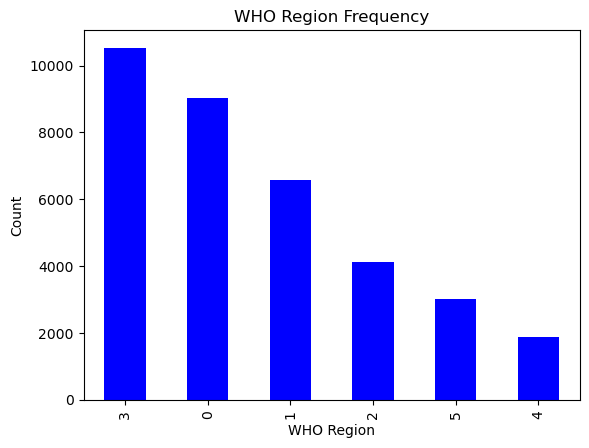

In [13]:
# Exploratory Data Analysis
#Europe = 3, Africa = 0, America = 1, Eastern Meditterranean = 2, Western Pacific = 5, Sount-east Asia = 4
df['WHO Region'].value_counts().plot(kind='bar', color = 'blue', title = 'WHO Region Frequency').set_ylabel('Count')

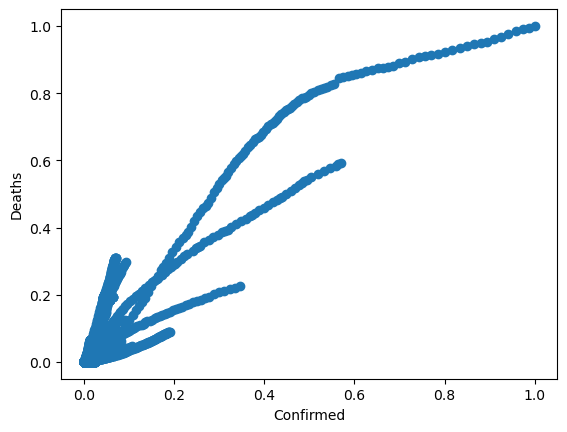

In [14]:
#Scatter plots to check for trends
plt.scatter(df['Confirmed'], df['Deaths'])
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

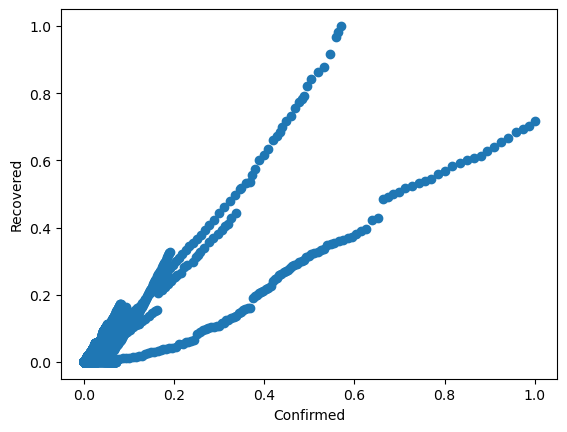

In [15]:
plt.scatter(df['Confirmed'], df['Recovered'])
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.show()

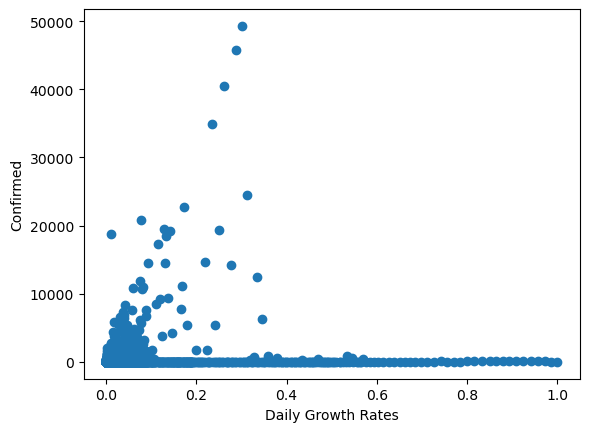

In [33]:
plt.scatter(df['Confirmed'], df['Daily Growth Rates'])
plt.xlabel('Daily Growth Rates')
plt.ylabel('Confirmed')
plt.show()

In [35]:
#Correlation
df.corr()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Motality Ratio,Daily Growth Rates
Date,1.000000e+00,-5.720593e-15,0.158197,0.151766,0.192145,0.113321,0.127137,0.083455,0.128326,-2.028911e-15,-0.155181,0.052310
Country/Region,-5.720593e-15,1.000000e+00,0.055704,0.065930,0.017751,0.074673,0.038726,0.043063,0.002028,5.963186e-02,-0.018568,-0.007552
Confirmed,1.581969e-01,5.570360e-02,1.000000,0.912016,0.894418,0.949940,0.893966,0.602815,0.675623,2.810138e-03,-0.041328,0.156462
Deaths,1.517663e-01,6.593034e-02,0.912016,1.000000,0.761093,0.891647,0.767812,0.630283,0.551870,1.541973e-02,-0.004300,0.093579
Recovered,1.921448e-01,1.775057e-02,0.894418,0.761093,1.000000,0.710665,0.808816,0.515154,0.761926,2.090165e-02,-0.076407,0.221113
Active,1.133213e-01,7.467318e-02,0.949940,0.891647,0.710665,1.000000,0.846513,0.583213,0.534027,-1.158514e-02,-0.013723,0.094458
New cases,1.271372e-01,3.872607e-02,0.893966,0.767812,0.808816,0.846513,1.000000,0.733583,0.725761,-1.083394e-02,-0.030074,0.278089
New deaths,8.345471e-02,4.306286e-02,0.602815,0.630283,0.515154,0.583213,0.733583,1.000000,0.503319,-3.759195e-03,0.008994,0.175510
New recovered,1.283259e-01,2.028465e-03,0.675623,0.551870,0.761926,0.534027,0.725761,0.503319,1.000000,-5.891610e-04,-0.117852,0.273743
WHO Region,-2.028911e-15,5.963186e-02,0.002810,0.015420,0.020902,-0.011585,-0.010834,-0.003759,-0.000589,1.000000e+00,-0.033849,0.025959


In [39]:
#Data Preparation for Modeling
df.set_index('Date', inplace = True)
df2 = df.drop(columns = ['Country/Region', 'WHO Region', 'Motality Ratio', 'Daily Growth Rates'],axis=1)

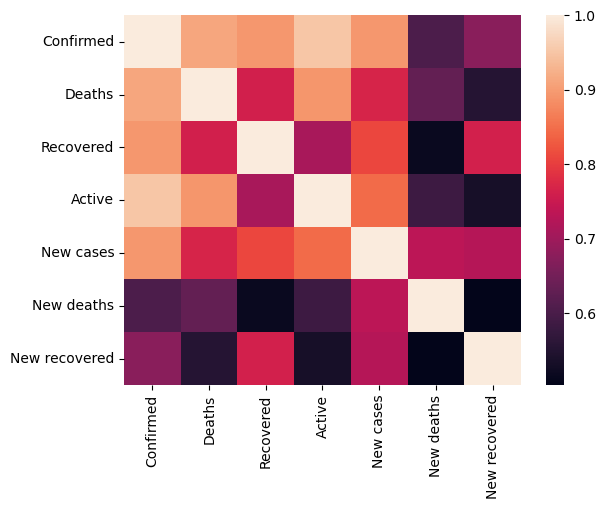

In [41]:
#Ensuring the data is now ready for modeling
sns.heatmap(df2.corr())

plt.show()

In [43]:
#Split data to train and test
train_size = int(0.8 * len(df2))
train_data, test_data = df2[0:train_size], df2[train_size:len(df2)]

In [45]:
#Using Arima Model for model training
model= ARIMA(train_data['New cases'], order=(5,1,0))
model_fit = model.fit()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [49]:
predictions = model_fit.predict(start=len(train_data), end=len(df2)-1, typ='levels')

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [51]:
#Evaluate model with Mean Square Error
mse = mean_squared_error(test_data['New cases'], predictions)
print('MSE: ', mse)

MSE:  0.005314442065479975


In [53]:
#Checking Root Mean Square Error for a more interpretable error etric
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

RMSE:  0.07290021992751444
